### Theory

polynomial regression can be considered as the most general form of linear regression. The non linear terms (power of the features and products of features) can be considered as new weighted inputs.

Example : y = w0 + w1*x + w2*x1^2 can be considered as y = w0 + w1 * x + w2 * x2

This means that we can now fit polynomial curve by using linear regression

 ### Python Implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

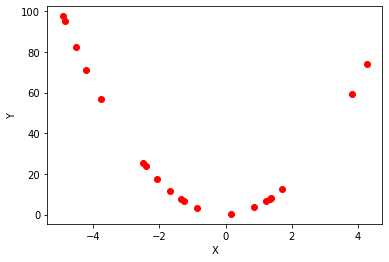

In [14]:
# Generate a parabola and fit a curve

# generate 20 uniform points from -5 to 5

x = np.array(list(np.random.rand(20)))*10 - 5
y = 4*(x**2)

# adding noise to the data
epsilon = np.random.rand(20)
y = y + epsilon
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(x, y,color='red')

intercept: 0.0
weight: 4.026314333171994


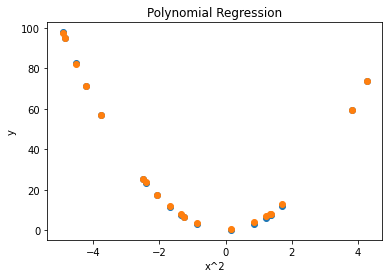

In [22]:
model = LinearRegression(fit_intercept=False)
model.fit((x**2).reshape(-1,1),y)
intercept = model.intercept_
weight = model.coef_
print("intercept: {}".format(intercept))
print("weight: {}".format(weight[0]))
y_pred = weight*(x**2) + intercept

plt.title("Polynomial Regression")
plt.xlabel("x^2")
plt.ylabel("y")
plt.scatter(x,y_pred)
plt.scatter(x,y)

## problem 2

Suppose we do not know what power of curve best fits the given data then we can find the best power numerically while making sure the model does not overfit 

In this case lets try to fit a curve on a sin function

In [25]:
# importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

%matplotlib inline

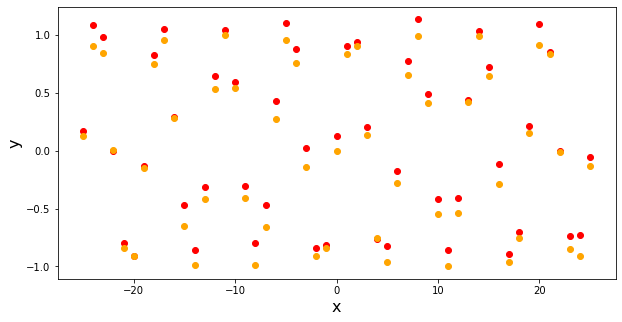

In [157]:
# generating data

# creating a dataset with curvilinear relationship
time = np.array(range(-25,26))
x = time
y_a = np.sin(x)

# adding noise
y = y_a + (np.random.rand(len(y_a))*0.2 - 0.01)
# plotting dataset
plt.figure(figsize=(10,5))
plt.scatter(x,y,color='red')
plt.scatter(x,y_a,color='orange')
plt.xlabel('x',fontsize=16)
plt.ylabel('y',fontsize=16)
#plt.plot(x,np.sin(x))
#plt.plot(x,y)
plt.show()

Error: 31.835330909686583 iteration number: 2


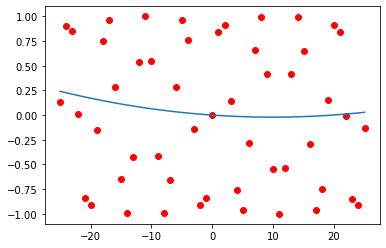

Error: 31.621100938896262 iteration number: 3


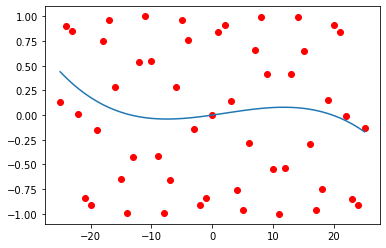

Error: 31.621100938896248 iteration number: 4


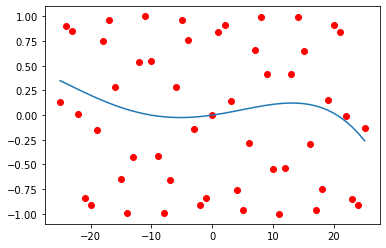

Error: 31.544028323367332 iteration number: 5


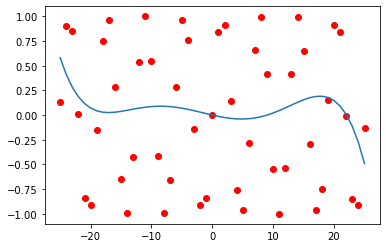

Error: 31.45963545242061 iteration number: 6


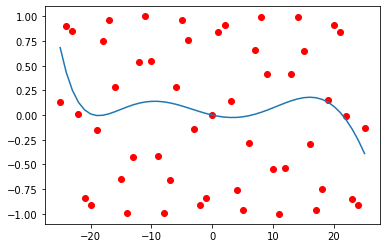

Error: 30.33487628631776 iteration number: 7


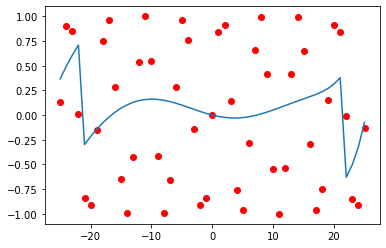

Error: 30.331253776678686 iteration number: 8


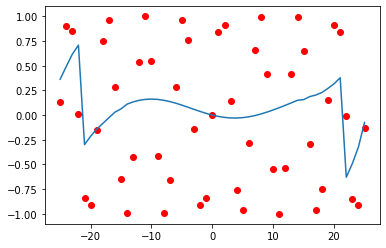

Error: 29.787836547281202 iteration number: 9


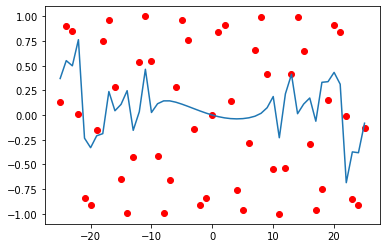

Error: 29.785395742522553 iteration number: 10


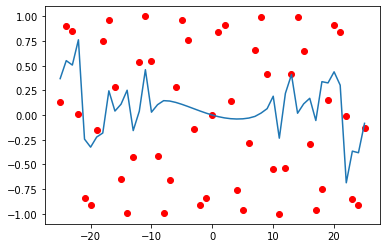

Error: 29.0440977695899 iteration number: 11


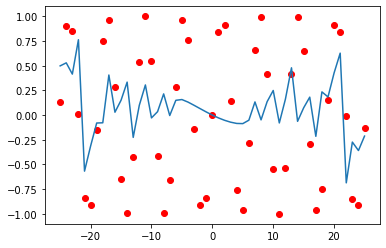

Error: 28.971682448213937 iteration number: 12


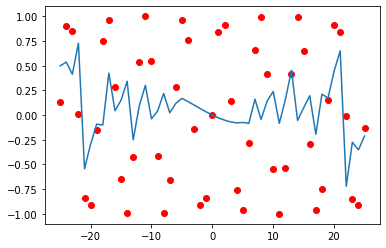

Error: 25.625521495329973 iteration number: 13


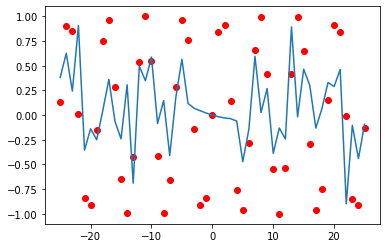

Error: 25.604744829739136 iteration number: 14


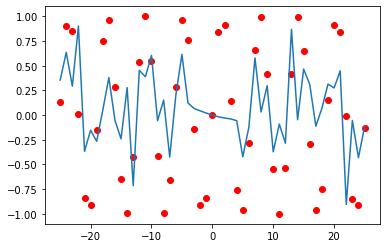

Error: 25.255261634000373 iteration number: 15


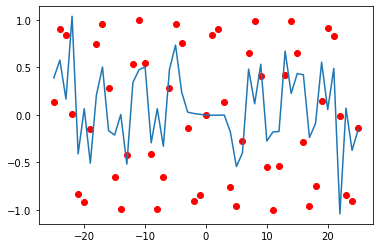

Error: 25.262902244357576 iteration number: 16


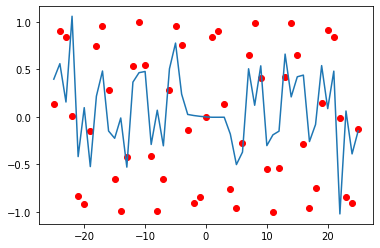

Error: 24.76268817234148 iteration number: 17


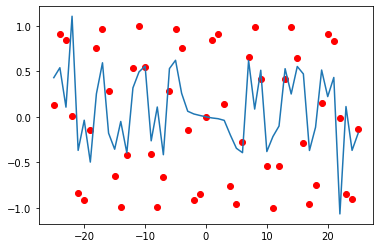

Error: 24.735595097041628 iteration number: 18


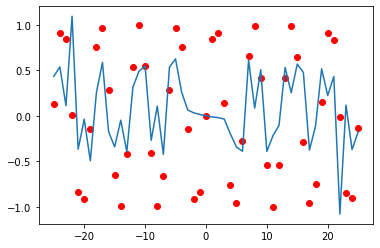

Error: 24.72569396499263 iteration number: 19


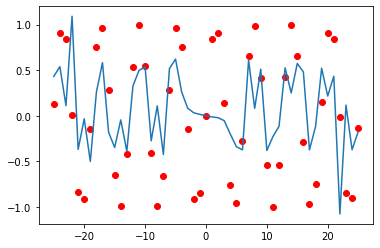

Error: 24.732951037350272 iteration number: 20


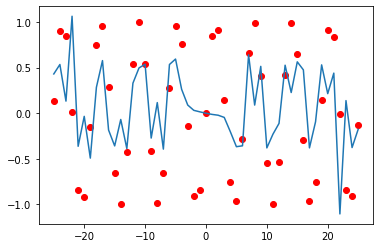

Error: 24.13945192078951 iteration number: 21


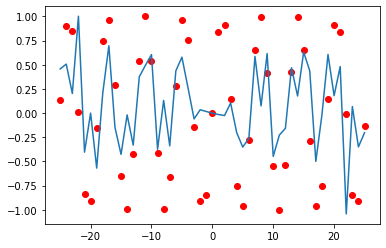

Error: 24.171230483569552 iteration number: 22


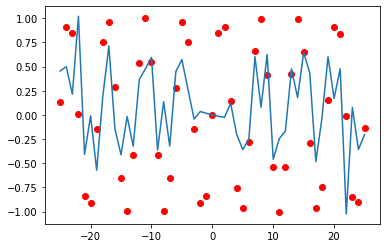

Error: 22.24868562829985 iteration number: 23


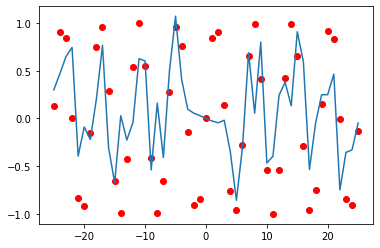

Error: 22.247140999123552 iteration number: 24


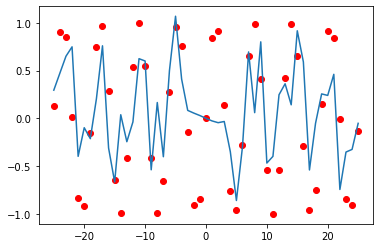

Error: 21.981129734233726 iteration number: 25


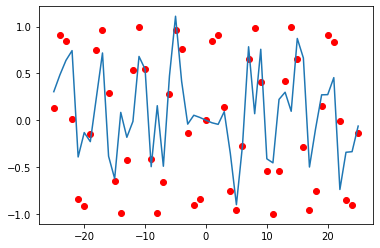

Error: 22.031008728264197 iteration number: 26


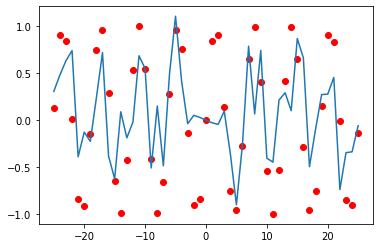

Error: 22.08461604263799 iteration number: 27


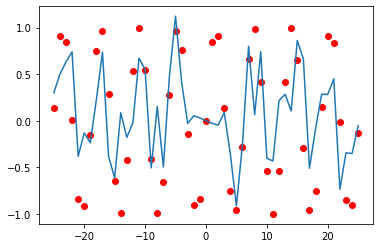

Error: 22.138970896732904 iteration number: 28


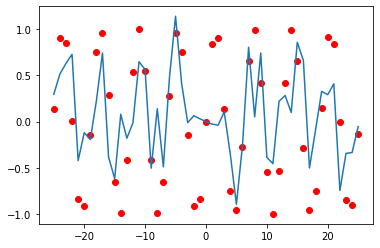

Error: 21.596999007874498 iteration number: 29


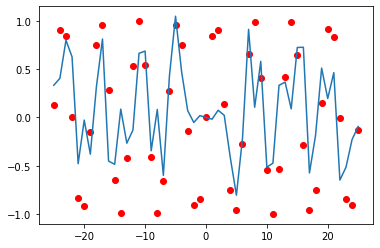

Error: 21.591709062720057 iteration number: 30


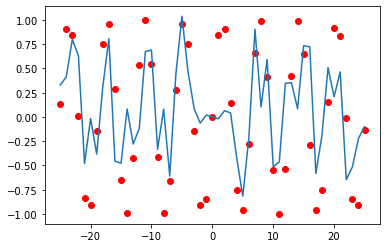

Error: 21.54916168716741 iteration number: 31


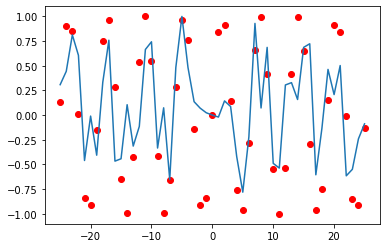

Error: 21.520473414563785 iteration number: 32


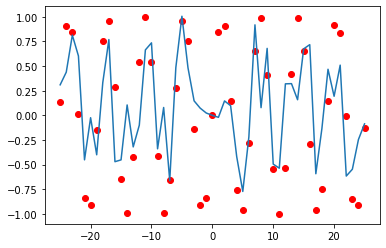

Error: 21.011398065540394 iteration number: 33


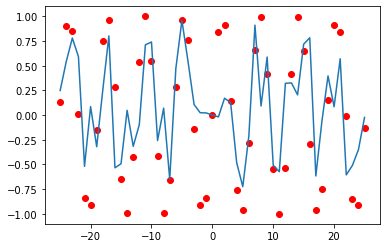

Error: 20.826861026264993 iteration number: 34


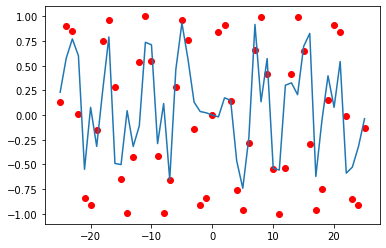

Error: 20.89536626220055 iteration number: 35


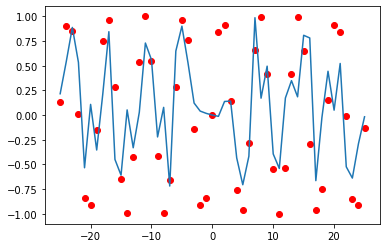

Error: 20.961191494236395 iteration number: 36


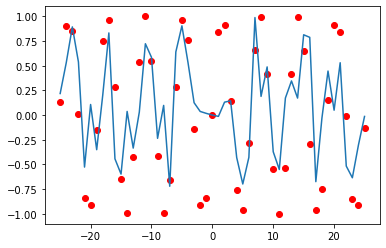

Error: 20.312074716158016 iteration number: 37


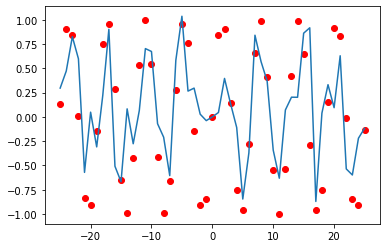

Error: 20.312606874071527 iteration number: 38


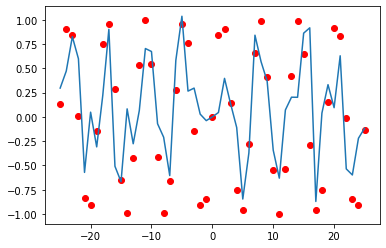

Error: 20.363318923851775 iteration number: 39


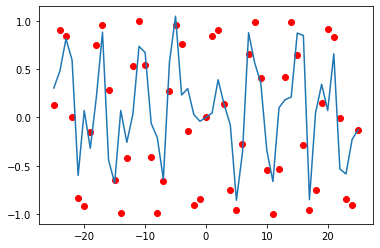

Error: 20.32307554433465 iteration number: 40


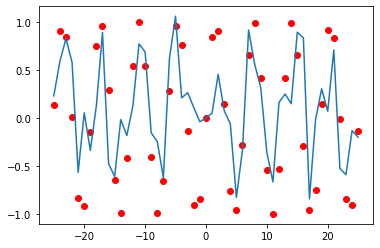

Error: 19.427546171779863 iteration number: 41


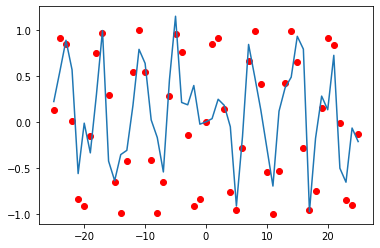

Error: 19.483900048372682 iteration number: 42


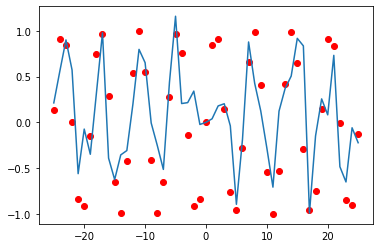

Error: 19.405958228617536 iteration number: 43


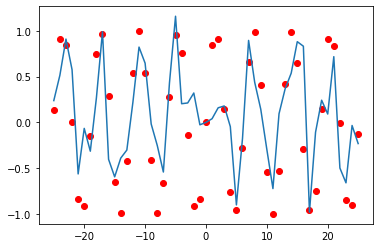

Error: 17.722992149269434 iteration number: 44


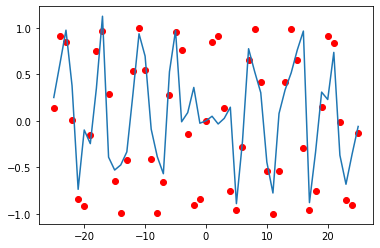

Error: 17.39782974054013 iteration number: 45


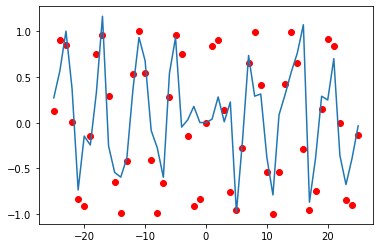

Error: 16.108870970178636 iteration number: 46


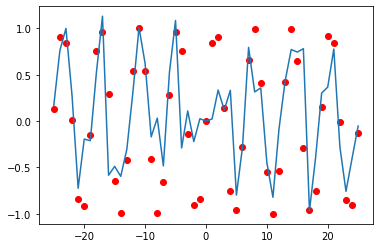

Error: 5.937530738475493 iteration number: 47


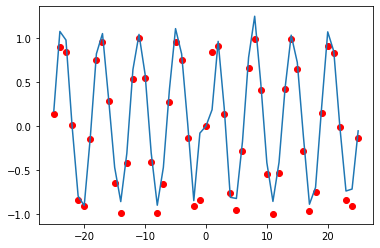

Error: 5.90503445390252 iteration number: 48


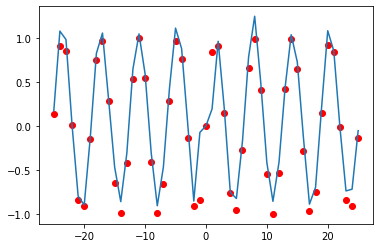

Error: 5.560734095206998 iteration number: 49


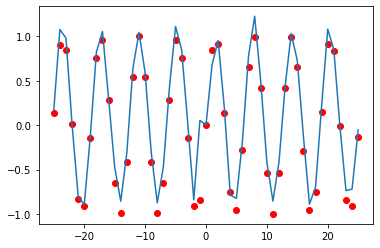

In [158]:
def expand(x,power):
    X = [x]
    for i in range(2,power+1):
        X.append(list(x**i))
    return np.reshape(X,(power,len(x))).T



for i in range(2,50):
    model = LinearRegression(fit_intercept=False)
    x_temp = expand(x,i)
    model.fit(x_temp,y)
    y_pred = model.predict(x_temp)
    plt.scatter(time,y_a,color='red') # actual without noise
    plt.plot(time,y_pred)
    print("Error: {0} iteration number: {1}".format(sum(np.abs(y_pred-y_a)),i))
    plt.show()